# Installing Spark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [0]:
!ls

sample_data  spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import re;
from pyspark import SparkConf, SparkContext, HiveContext;
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
from heapq import nlargest;
#sc = SparkContext(master="local",appName="Spark Demo");
#sqlContext = HiveContext(sc);

In [0]:
#sc._conf.get('spark.driver.memory')


In [0]:
conf = SparkConf().setAppName("App")
conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '20G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '15G'))
sc = SparkContext(conf=conf)

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Consolidating Files

In [0]:
import pandas as pd

In [0]:
#directory = '/content/drive/Shared drives/IDS561/nyt-comments/'
filenames = ['CommentsApril2017.csv', 'CommentsMay2017.csv', 'CommentsMarch2017.csv', 'CommentsFeb2017.csv', 'CommentsJan2017.csv']
with open('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2017_Final.csv', 'w') as outfile:
    for fname in filenames:
        with open('/content/drive/Shared drives/IDS561/IDS 561 project files/Jan - May 2017 Comments/{}'.format(fname)) as infile:
            outfile.write(infile.read())

In [0]:
#directory = '/content/drive/Shared drives/IDS561/nyt-comments/'
filenames = ['CommentsApril2018.csv', 'CommentsMarch2018.csv', 'CommentsFeb2018.csv', 'CommentsJan2018.csv']
with open('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2018_Final.csv', 'w') as outfile:
    for fname in filenames:
        with open('/content/drive/Shared drives/IDS561/IDS 561 project files/Jan - April 2018 Comments/{}'.format(fname)) as infile:
            outfile.write(infile.read())

In [0]:
comments_file2017 = pd.read_csv("/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2017_Final.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,4,5,8,9,10,11,13,14,15,17,18,19,20,21,23,25,26,27,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
comments_file2018 = pd.read_csv("/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2018_Final.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,4,5,8,9,10,11,13,14,15,17,18,19,20,21,23,25,26,27,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
comments_file2017.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1491245186,58def1347c459f24986d7c80,716,This project makes me happy to be a 30+ year T...,22022598,22022598,<br/>,comment,1491237056,1,False,0,Insider,0,NaN,22022598,https://graphics8.nytimes.com/images/apps/time...,2,2,NaN,0,NaN,Unknown,0,approved,1,0,1491245186,Rob Gayle,46006296,"Riverside, CA",NaN,NaN,News
1,1491188619,58def1347c459f24986d7c80,716,Stunning photos and reportage. Infuriating tha...,22017350,22017350,NaN,comment,1491180489,1,False,0,Insider,0,NaN,22017350,https://graphics8.nytimes.com/images/apps/time...,2,1,NaN,0,NaN,Unknown,0,approved,1,0,1491188619,Susan A.,29202761,<br/>,NaN,NaN,News
2,1491188617,58def1347c459f24986d7c80,716,Brilliant work from conception to execution. I...,22017334,22017334,<br/>,comment,1491179470,1,False,0,Insider,0,NaN,22017334,https://graphics8.nytimes.com/images/apps/time...,2,3,NaN,0,NaN,Unknown,0,approved,1,0,1491188617,Meta,63944806,Raleigh NC,NaN,NaN,News
3,1491167820,58def1347c459f24986d7c80,716,NYT reporters should provide a contributor's l...,22015913,22015913,<br/>,comment,1491150196,1,False,0,Insider,0,NaN,22015913,https://graphics8.nytimes.com/images/apps/time...,2,7,NaN,2,NaN,Unknown,0,approved,1,0,1491167820,Tom Wyrick,1266184,"Missouri, USA",NaN,NaN,News
4,1491167815,58def1347c459f24986d7c80,716,Could only have been done in print. Stunning.,22015466,22015466,<br/>,comment,1491147284,1,False,0,Insider,0,NaN,22015466,http://profile.ak.fbcdn.net/hprofile-ak-snc4/h...,2,5,NaN,0,NaN,Unknown,0,approved,1,0,1491167815,Joe Sharkey,61121360,"Tucson, Arizona",NaN,NaN,News


In [0]:
Comments2017_new = comments_file2017.drop(columns = ['approveDate','commentSequence','commentTitle','commentType','createDate','depth','inReplyTo','parentID','parentUserDisplayName','permID','picURL','printPage','recommendedFlag','replyCount','reportAbuseFlag','sharing','status','timespeople','trusted','updateDate','userDisplayName','userID','userLocation','userTitle','userURL','typeOfMaterial'])

In [0]:
Comments2018_new = comments_file2018.drop(columns = ['approveDate','commentSequence','commentTitle','commentType','createDate','depth','inReplyTo','parentID','parentUserDisplayName','permID','picURL','printPage','recommendedFlag','replyCount','reportAbuseFlag','sharing','status','timespeople','trusted','updateDate','userDisplayName','userID','userLocation','userTitle','userURL','typeOfMaterial'])

In [0]:
Comments2017_new.isnull().sum()

articleID           0
articleWordCount    0
commentBody         0
commentID           0
editorsSelection    0
newDesk             0
recommendations     0
sectionName         0
dtype: int64

In [0]:
Comments2017_new.isnull().sum()

articleID           0
articleWordCount    0
commentBody         0
commentID           0
editorsSelection    0
newDesk             0
recommendations     0
sectionName         0
dtype: int64

In [0]:
Comments2017_new.head()

,articleID,articleWordCount,commentBody,commentID,editorsSelection,newDesk,recommendations,sectionName
0,58def1347c459f24986d7c80,716,This project makes me happy to be a 30+ year T...,22022598,False,Insider,2,Unknown
1,58def1347c459f24986d7c80,716,Stunning photos and reportage. Infuriating tha...,22017350,False,Insider,1,Unknown
2,58def1347c459f24986d7c80,716,Brilliant work from conception to execution. I...,22017334,False,Insider,3,Unknown
3,58def1347c459f24986d7c80,716,NYT reporters should provide a contributor's l...,22015913,False,Insider,7,Unknown
4,58def1347c459f24986d7c80,716,Could only have been done in print. Stunning.,22015466,False,Insider,5,Unknown


In [0]:
Comments2017_new.to_csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2017_dropped_updated.csv',index=False)

In [0]:
Comments2018_new.to_csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2018_dropped_updated.csv',index=False)

# Cleaning data

In [0]:
comments2017_dropped = spark.read.option("escape", "\"").csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2017_dropped_updated.csv',inferSchema=True, header =True)

In [0]:
comments2017_dropped.show()

+--------------------+----------------+--------------------+---------+----------------+-------+---------------+-----------+
|           articleID|articleWordCount|         commentBody|commentID|editorsSelection|newDesk|recommendations|sectionName|
+--------------------+----------------+--------------------+---------+----------------+-------+---------------+-----------+
|58def1347c459f249...|             716|This project make...| 22022598|           False|Insider|              2|    Unknown|
|58def1347c459f249...|             716|Stunning photos a...| 22017350|           False|Insider|              1|    Unknown|
|58def1347c459f249...|             716|Brilliant work fr...| 22017334|           False|Insider|              3|    Unknown|
|58def1347c459f249...|             716|NYT reporters sho...| 22015913|           False|Insider|              7|    Unknown|
|58def1347c459f249...|             716|Could only have b...| 22015466|           False|Insider|              5|    Unknown|
|58def13

In [0]:
comments2018_dropped = spark.read.option("escape", "\"").csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Comments2018_dropped_updated.csv',inferSchema=True, header =True)

In [0]:
comments2018_dropped.show()

+--------------------+----------------+--------------------+---------+----------------+----------+---------------+------------+
|           articleID|articleWordCount|         commentBody|commentID|editorsSelection|   newDesk|recommendations| sectionName|
+--------------------+----------------+--------------------+---------+----------------+----------+---------------+------------+
|5adf6684068401528...|             781|How could the lea...| 26853969|           False|    Sports|              0|Pro Football|
|5adf6684068401528...|             781|So then the execs...| 26853699|           False|    Sports|              0|Pro Football|
|5adf6684068401528...|             781|I would not want ...| 26853677|           False|    Sports|              0|Pro Football|
|5adf6684068401528...|             781|Could the cheerle...| 26853784|           False|    Sports|              3|Pro Football|
|5adf653f068401528...|             656|Seeking conclusio...| 26854236|           False|   Climate|      

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import string
import re

# remove non ASCII characters
def strip_non_ascii(data_str):
  #data_str = None 
  try:
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in data_str if 0 < ord(c) < 127)
    return ''.join(stripped)
  except:
    return None
# setup pyspark udf function
strip_non_ascii_udf = udf(strip_non_ascii, StringType())

In [0]:
comments2017_dropped_noASCII = comments2017_dropped.withColumn('text_non_asci',strip_non_ascii_udf(comments2017_dropped['commentBody']))

In [0]:
comments2018_dropped_noASCII = comments2018_dropped.withColumn('text_non_asci',strip_non_ascii_udf(comments2018_dropped['commentBody']))

In [0]:
# fixed abbreviation
def fix_abbreviation(data_str):
  #data_str = None
  try:
    data_str = data_str.lower()
    data_str = re.sub(r'\bthats\b', 'that is', data_str)
    data_str = re.sub(r'\bive\b', 'i have', data_str)
    data_str = re.sub(r'\bim\b', 'i am', data_str)
    data_str = re.sub(r'\bya\b', 'yeah', data_str)
    data_str = re.sub(r'\bcant\b', 'can not', data_str)
    data_str = re.sub(r'\bdont\b', 'do not', data_str)
    data_str = re.sub(r'\bwont\b', 'will not', data_str)
    data_str = re.sub(r'\bid\b', 'i would', data_str)
    data_str = re.sub(r'wtf', 'what the fuck', data_str)
    data_str = re.sub(r'\bwth\b', 'what the hell', data_str)
    data_str = re.sub(r'\br\b', 'are', data_str)
    data_str = re.sub(r'\bu\b', 'you', data_str)
    data_str = re.sub(r'\bk\b', 'OK', data_str)
    data_str = re.sub(r'\bsux\b', 'sucks', data_str)
    data_str = re.sub(r'\bno+\b', 'no', data_str)
    data_str = re.sub(r'\bcoo+\b', 'cool', data_str)
    data_str = re.sub(r'rt\b', '', data_str)
    data_str = re.sub(r'<br/>', '', data_str)
    data_str = data_str.strip()
    return data_str
  except:
    return None
fix_abbreviation_udf = udf(fix_abbreviation, StringType())

In [0]:
comments2017_dropped_fixabbreviation = comments2017_dropped_noASCII.withColumn('fixed_abbrev',fix_abbreviation_udf(comments2017_dropped_noASCII['text_non_asci']))

In [0]:
comments2018_dropped_fixabbreviation = comments2018_dropped_noASCII.withColumn('fixed_abbrev',fix_abbreviation_udf(comments2018_dropped_noASCII['text_non_asci']))

In [0]:
def remove_features(data_str):
  try:
    # compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")
    # convert to lowercase
    data_str = data_str.lower()
    # remove hyperlinks
    data_str = url_re.sub(' ', data_str)
    # remove @mentions
    data_str = mention_re.sub(' ', data_str)
    # remove puncuation
    data_str = punc_re.sub(' ', data_str)
    # remove numeric 'words'
    data_str = num_re.sub(' ', data_str)
    # remove non a-z 0-9 characters and words shorter than 1 characters
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word) and len(word) > 1:
                cleaned_str = word
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word) and len(word) > 1:
                cleaned_str = cleaned_str + ' ' + word
            else:
                cleaned_str += ' '
        list_pos += 1
    # remove unwanted space, *.split() will automatically split on
    # whitespace and discard duplicates, the " ".join() joins the
    # resulting list into one string.
    return " ".join(cleaned_str.split())

  except:
      return None
# setup pyspark udf function
remove_features_udf = udf(remove_features, StringType())

In [0]:
comments2017_dropped_nofeatures = comments2017_dropped_fixabbreviation.withColumn('Cleancomments',remove_features_udf(comments2017_dropped_fixabbreviation['fixed_abbrev']))

In [0]:
comments2017_dropped_nofeatures.show(20)

+--------------------+----------------+--------------------+---------+----------------+-------+---------------+-----------+--------------------+--------------------+--------------------+
|           articleID|articleWordCount|         commentBody|commentID|editorsSelection|newDesk|recommendations|sectionName|       text_non_asci|        fixed_abbrev|       Cleancomments|
+--------------------+----------------+--------------------+---------+----------------+-------+---------------+-----------+--------------------+--------------------+--------------------+
|58def1347c459f249...|             716|This project make...| 22022598|           False|Insider|              2|    Unknown|This project make...|this project make...|this project make...|
|58def1347c459f249...|             716|Stunning photos a...| 22017350|           False|Insider|              1|    Unknown|Stunning photos a...|stunning photos a...|stunning photos a...|
|58def1347c459f249...|             716|Brilliant work fr...| 2201

In [0]:
comments2018_dropped_nofeatures = comments2018_dropped_fixabbreviation.withColumn('Cleancomments',remove_features_udf(comments2018_dropped_fixabbreviation['fixed_abbrev']))

In [0]:
comments2018_dropped_nofeatures.show(20)

+--------------------+----------------+--------------------+---------+----------------+----------+---------------+------------+--------------------+--------------------+--------------------+
|           articleID|articleWordCount|         commentBody|commentID|editorsSelection|   newDesk|recommendations| sectionName|       text_non_asci|        fixed_abbrev|       Cleancomments|
+--------------------+----------------+--------------------+---------+----------------+----------+---------------+------------+--------------------+--------------------+--------------------+
|5adf6684068401528...|             781|How could the lea...| 26853969|           False|    Sports|              0|Pro Football|How could the lea...|how could the lea...|how could the lea...|
|5adf6684068401528...|             781|So then the execs...| 26853699|           False|    Sports|              0|Pro Football|So then the execs...|so then the execs...|so then the execs...|
|5adf6684068401528...|             781|I woul

In [0]:
comments2018_dropped_nofeatures=comments2018_dropped_nofeatures.drop('text_non_asci')#,'fixed_abbrev'])

NameError: ignored

In [0]:
comments2017_dropped_nofeatures= comments2017_dropped_nofeatures.drop('text_non_asci')#,'fixed_abbrev'])

In [0]:
comments2017_dropped_nofeatures=comments2017_dropped_nofeatures.drop('fixed_abbrev')

In [0]:
comments2018_dropped_nofeatures=comments2018_dropped_nofeatures.drop('fixed_abbrev')

In [0]:
from textblob import TextBlob
def sentiment_score(chat):
  try:
    return TextBlob(chat).sentiment.polarity
  except:
    return None

In [0]:
import pyspark.sql.functions as F

In [0]:
from pyspark.sql.types import FloatType
sentiment_score_udf = F.udf(lambda x: sentiment_score(x), FloatType())

In [0]:
comments2017_dropped_nofeatures2 = comments2017_dropped_nofeatures.select('articleID','articleWordCount','commentBody','commentID','newDesk','recommendations','sectionName','editorsSelection','Cleancomments',sentiment_score_udf('Cleancomments').alias('sentiment_score'))

In [0]:
comments2017_dropped_nofeatures2.show(5)

+--------------------+----------------+--------------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|           articleID|articleWordCount|         commentBody|commentID|newDesk|recommendations|sectionName|editorsSelection|       Cleancomments|sentiment_score|
+--------------------+----------------+--------------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|58def1347c459f249...|             716|This project make...| 22022598|Insider|              2|    Unknown|           False|this project make...|            0.8|
|58def1347c459f249...|             716|Stunning photos a...| 22017350|Insider|              1|    Unknown|           False|stunning photos a...|          -0.04|
|58def1347c459f249...|             716|Brilliant work fr...| 22017334|Insider|              3|    Unknown|           False|brilliant work fr...|     0.18472221|
|58def1347c459f249...|            

In [0]:
comments2018_dropped_nofeatures2 = comments2018_dropped_nofeatures.select('articleID','articleWordCount','commentBody','commentID','newDesk','recommendations','sectionName','editorsSelection','Cleancomments',sentiment_score_udf('Cleancomments').alias('sentiment_score'))

In [0]:
comments2018_dropped_nofeatures2.show(5)

+--------------------+----------------+--------------------+---------+-------+---------------+------------+----------------+--------------------+---------------+
|           articleID|articleWordCount|         commentBody|commentID|newDesk|recommendations| sectionName|editorsSelection|       Cleancomments|sentiment_score|
+--------------------+----------------+--------------------+---------+-------+---------------+------------+----------------+--------------------+---------------+
|5adf6684068401528...|             781|How could the lea...| 26853969| Sports|              0|Pro Football|           False|how could the lea...|            0.0|
|5adf6684068401528...|             781|So then the execs...| 26853699| Sports|              0|Pro Football|           False|so then the execs...|    -0.15555556|
|5adf6684068401528...|             781|I would not want ...| 26853677| Sports|              0|Pro Football|           False|would not want to...|            0.6|
|5adf6684068401528...|      

In [0]:
from pyspark.sql.types import*

In [0]:
comments2018_dropped_nofeatures2.registerTempTable("data2018")
grouped2018 = spark.sql("SELECT articleID, avg(sentiment_score) as sentiment_score from data2018 group by articleID LIMIT 5")

In [0]:
comments2018_dropped_nofeatures2.registerTempTable("data2018")
grouped2018 = spark.sql("SELECT articleID, avg(sentiment_score) as sentiment_score from data2018 group by articleID LIMIT 5")

In [0]:
grouped2018.show(5)


+--------------------+--------------------+
|           articleID|     sentiment_score|
+--------------------+--------------------+
|5adef218068401528...| 0.09086767231802577|
|5aca9a01068401528...|0.018774141514682614|
|5ac776cd068401528...| 0.07667976062566595|
|5ac73716068401528...|0.060098117074455344|
|5ac4f2a4068401528...| 0.09982647961005568|
+--------------------+--------------------+



In [0]:
comments2017_dropped_nofeatures2=comments2017_dropped_nofeatures2.drop('commentBody')

In [0]:
comments2017_dropped_nofeatures2.show()

+--------------------+----------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|           articleID|articleWordCount|commentID|newDesk|recommendations|sectionName|editorsSelection|       Cleancomments|sentiment_score|
+--------------------+----------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|58def1347c459f249...|             716| 22022598|Insider|              2|    Unknown|           False|this project make...|            0.8|
|58def1347c459f249...|             716| 22017350|Insider|              1|    Unknown|           False|stunning photos a...|          -0.04|
|58def1347c459f249...|             716| 22017334|Insider|              3|    Unknown|           False|brilliant work fr...|     0.18472221|
|58def1347c459f249...|             716| 22015913|Insider|              7|    Unknown|           False|nyt reporters sho...|    0.020833334|
|58def1347c459f249..

In [0]:
comments2018_dropped_nofeatures2=comments2018_dropped_nofeatures2.drop('commentBody')

In [0]:
comments2017_dropped_nofeatures2.repartition(1).write.format("com.databricks.spark.csv").option("header", "true").save("/content/drive/Shared drives/IDS561/Clean_2017_comments_editorselection.csv")

In [0]:
comments2018_dropped_nofeatures2.repartition(1).write.format("com.databricks.spark.csv").option("header", "true").save("/content/drive/Shared drives/IDS561/Clean_2018_comments_editorselection.csv")

# Visualization

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
df = pd.read_csv("/content/drive/Shared drives/IDS561/IDS 561 project files/Clean_comments_with_editorpick.csv", index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()


,articleWordCount,commentID,newDesk,recommendations,sectionName,editorsSelection,Cleancomments,sentiment_score
articleID,,,,,,,,
5adf6684068401528a2aa69b,781,26853969,Sports,0,Pro Football,False,how could the league possibly refuse this offer,0.000000
5adf6684068401528a2aa69b,781,26853699,Sports,0,Pro Football,False,so then the execs can be like yeah we will sit...,-0.155556
5adf6684068401528a2aa69b,781,26853677,Sports,0,Pro Football,False,would not want to play chess against these che...,0.600000
5adf6684068401528a2aa69b,781,26853784,Sports,3,Pro Football,False,could the cheerleaders join the actors equity ...,0.100000
5adf653f068401528a2aa697,656,26854236,Climate,0,Unknown,False,seeking conclusions which suppo preconceived i...,0.012857


In [0]:
df.isna().sum()

articleWordCount         0
commentID                0
newDesk                  0
recommendations          0
sectionName         149504
editorsSelection         0
Cleancomments            0
sentiment_score          0
dtype: int64

In [0]:
section = df.groupby("newDesk")
section.describe().head()


articleWordCount               ... sentiment_score     
                        count         mean  ...             75%  max
newDesk                                     ...                     
Arts&Leisure           4406.0  2305.804131  ...        0.254309  1.0
BookReview             2183.0  1782.488319  ...        0.229107  1.0
Business              60003.0  1316.468277  ...        0.183333  1.0
Climate                7096.0  1411.601607  ...        0.173616  1.0
Culture               13146.0  1348.578199  ...        0.246395  1.0

[5 rows x 32 columns]

In [0]:
section.count().sort_values(by="commentID",ascending=False).head()


,articleWordCount,commentID,recommendations,sectionName,editorsSelection,Cleancomments,sentiment_score
newDesk,,,,,,,
OpEd,309356,309356,309356,252102,309356,309338,309356
Washington,185649,185649,185649,184570,185649,185642,185649
Business,54946,54946,54946,43910,54946,54944,54946
National,51587,51587,51587,42555,51587,51586,51587
Editorial,41201,41201,41201,33763,41201,41201,41201


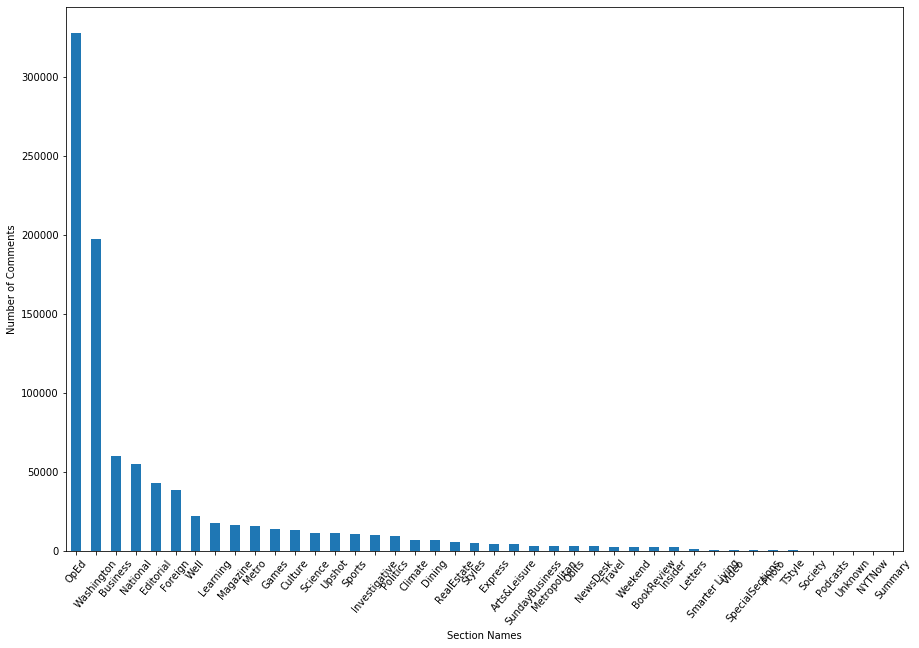

In [0]:
plt.figure(figsize=(15,10))
section.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Section Names")
plt.ylabel("Number of Comments")
plt.show()

In [0]:
text = df.commentBody[0]

In [0]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
comment = " ".join(review for review in df.commentBody)
print ("There are {} words in the combination of all review.".format(len(comment)))

In [0]:
wordcloud2 = WordCloud(max_words=100, background_color="white").generate(comment)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


Sports


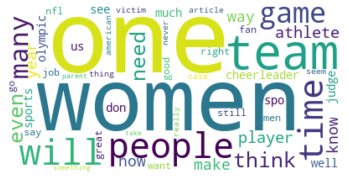

Climate


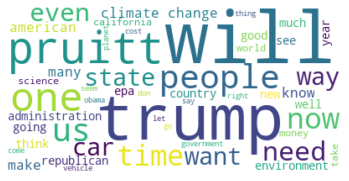

Dining


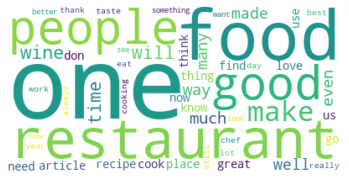

Washington


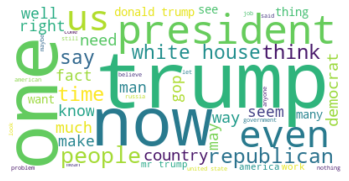

Foreign


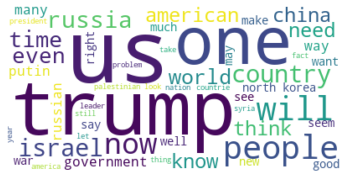

NYTNow


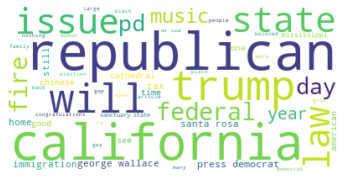

Express


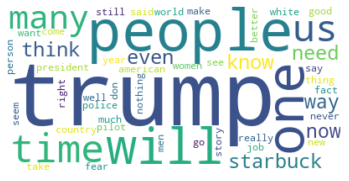

Insider


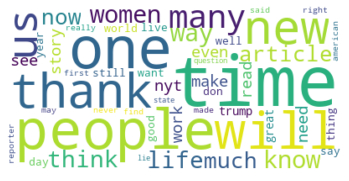

Learning


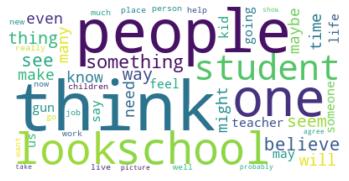

Magazine


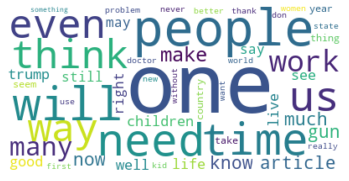

Metro


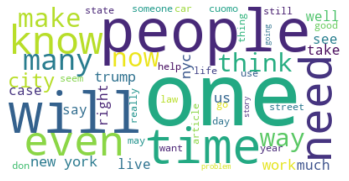

RealEstate


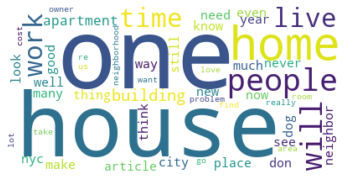

Business


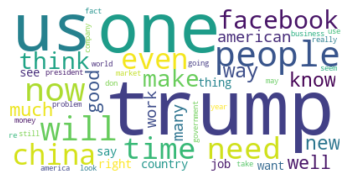

Politics


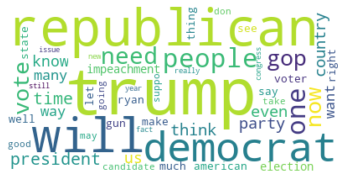

National


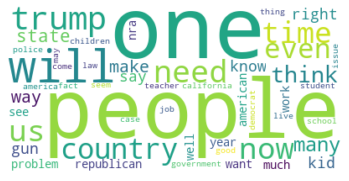

SpecialSections


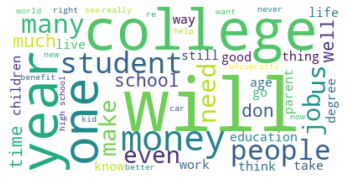

BookReview


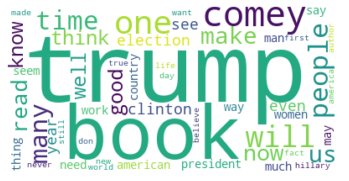

Well


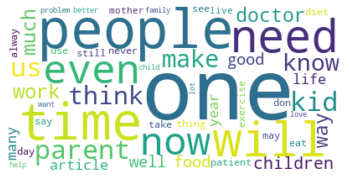

Games


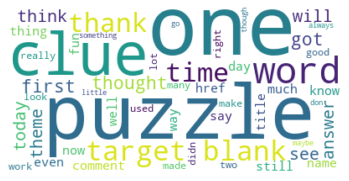

Culture


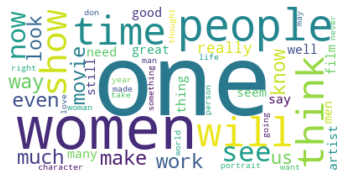

Editorial


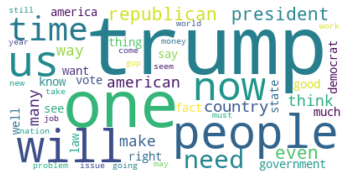

OpEd


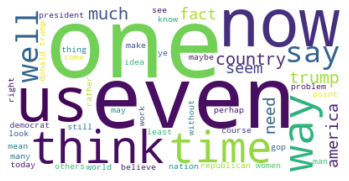

Arts&Leisure


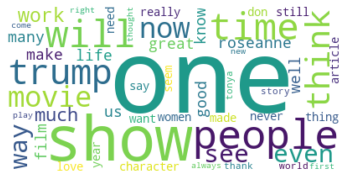

Science


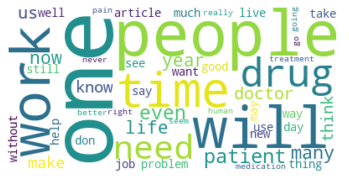

Travel


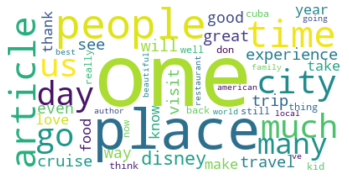

Upshot


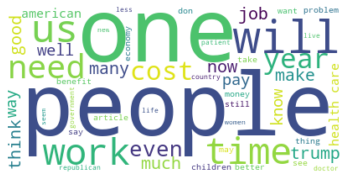

Metropolitan


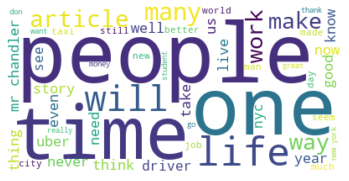

Investigative


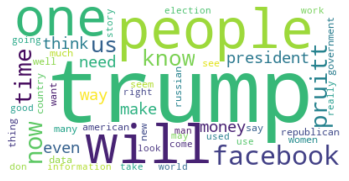

NewsDesk


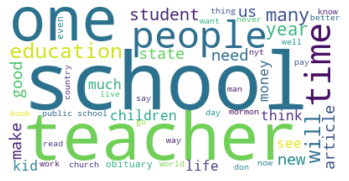

Weekend


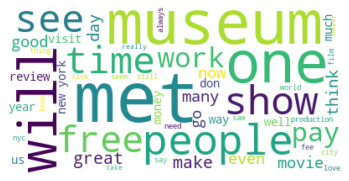

SundayBusiness


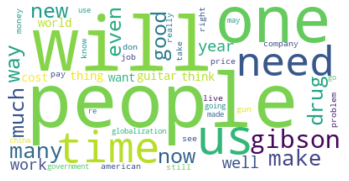

Styles


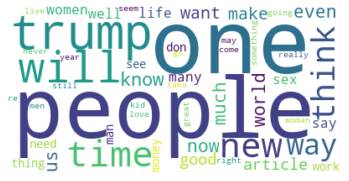

Photo


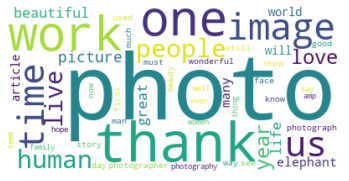

Society


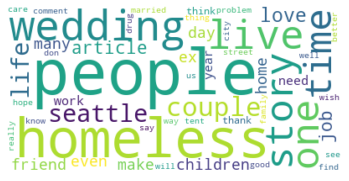

Obits


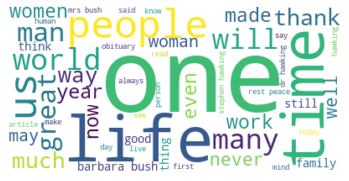

Smarter Living


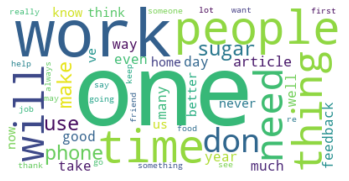

Podcasts


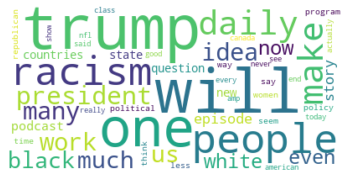

TStyle


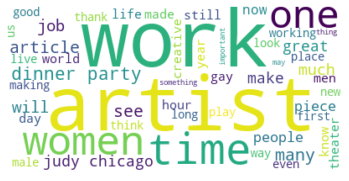

Summary


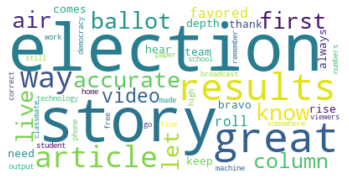

Video


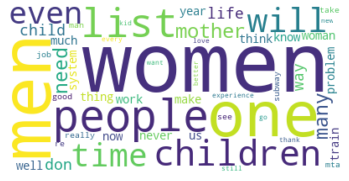

Unknown


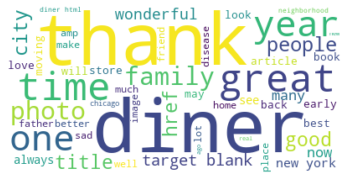

Letters


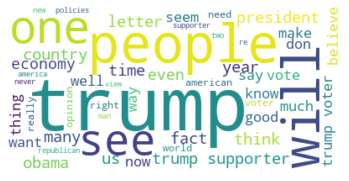

In [0]:
for name in df.newDesk.unique():
  print(name)
  comment = " ".join(review for review in df.Cleancomments[df.newDesk == name])
  #print ("There are {} words in the combination of all review.".format(len(comment)))
  wordcloud2 = WordCloud(max_words=50, background_color="white").generate(comment)
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


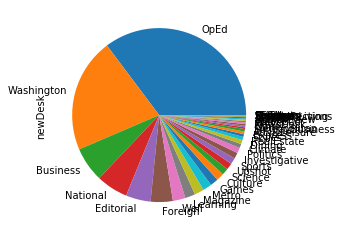

In [0]:
df.newDesk.value_counts().plot(kind='pie')

Text(0.5, 0.98, 'Sentiment Polarity Distribution')

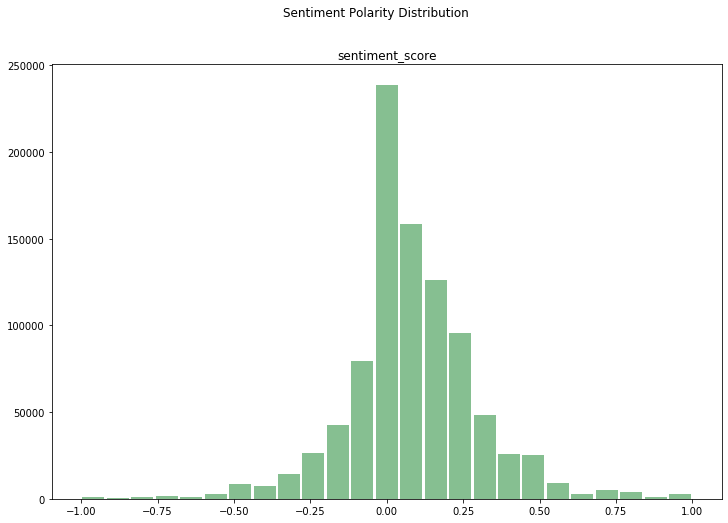

In [0]:
import pylab as pl
df.hist(column='sentiment_score', 
        bins=25, grid=False, figsize=(12,8), 
        color='#86bf91', zorder=2, rwidth=0.9)
pl.suptitle("Sentiment Polarity Distribution")


Text(0.5, 0.98, 'Word Count Distribution')

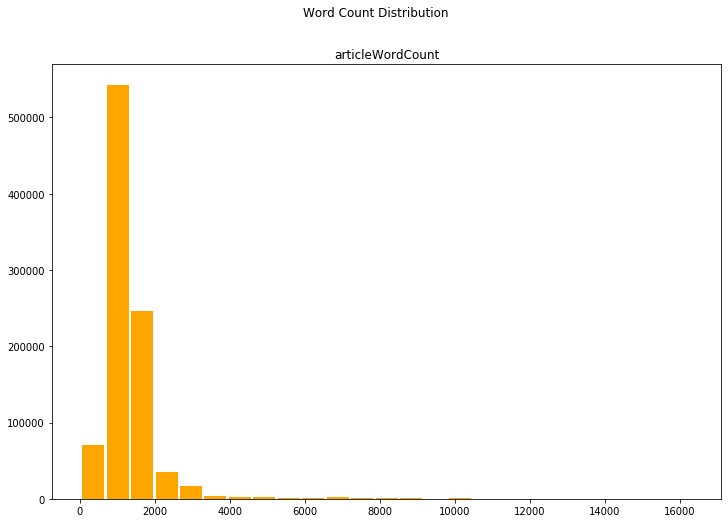

In [0]:
df.hist(column='articleWordCount', 
        bins=25, grid=False, figsize=(12,8), 
        color='orange', zorder=2, rwidth=0.9)
pl.suptitle("Word Count Distribution")


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Cleancomments'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


trump 356228
people 227339
like 169546
just 155088
time 110183
don 103493
think 98833
president 92865
know 86520
country 85688
good 85408
right 83530
way 83034
need 81709
make 78019
years 76841
did 73861
world 70297
does 69638
want 68354


In [0]:
#df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
#    kind='bar', linecolor='black', title='Top 20 words in review after removing stop words')

topwords = df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False)

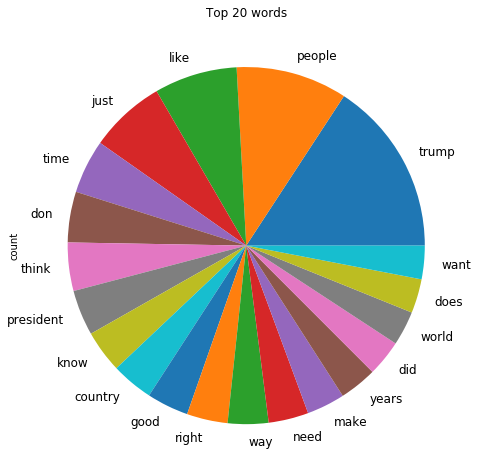

In [0]:
topwords.plot.pie(title ="Top 20 words", figsize=(8, 10), legend=False, fontsize=12 )

# Modeling


In [0]:
comments_file_2017 = spark.read.csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Clean_comments_with_editorpick_2017.csv',inferSchema=True, header =True)
type(comments_file_2017)

pyspark.sql.dataframe.DataFrame

In [0]:
comments_file_2018 = spark.read.csv('/content/drive/Shared drives/IDS561/IDS 561 project files/Clean_comments_with_editorpick_2018.csv',inferSchema=True, header =True)
type(comments_file_2018)

In [0]:
from pyspark.sql.functions import isnan,isnull, when, count, col

comments_file_2017.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in comments_file_2017.columns]).show()

+---------+----------------+---------+-------+---------------+-----------+----------------+-------------+---------------+
|articleID|articleWordCount|commentID|newDesk|recommendations|sectionName|editorsSelection|Cleancomments|sentiment_score|
+---------+----------------+---------+-------+---------------+-----------+----------------+-------------+---------------+
|        0|               0|        0|      0|              0|          0|               0|           55|              0|
+---------+----------------+---------+-------+---------------+-----------+----------------+-------------+---------------+



In [0]:
from pyspark.sql.functions import isnan,isnull, when, count, col

comments_file_2018.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in comments_file_2018.columns]).show()

In [0]:
comments_file = comments_file_2017.na.drop()

In [0]:
comments_file = comments_file_2018.na.drop()

In [0]:
#comments_file.show(5)

+--------------------+----------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|           articleID|articleWordCount|commentID|newDesk|recommendations|sectionName|editorsSelection|       Cleancomments|sentiment_score|
+--------------------+----------------+---------+-------+---------------+-----------+----------------+--------------------+---------------+
|58def1347c459f249...|             716| 22022598|Insider|              2|    Unknown|           FALSE|this project make...|            0.8|
|58def1347c459f249...|             716| 22017350|Insider|              1|    Unknown|           FALSE|stunning photos a...|          -0.04|
|58def1347c459f249...|             716| 22017334|Insider|              3|    Unknown|           FALSE|brilliant work fr...|     0.18472221|
|58def1347c459f249...|             716| 22015913|Insider|              7|    Unknown|           FALSE|nyt reporters sho...|    0.020833334|
|58def1347c459f249..

In [0]:
(train_set, test_set) = comments_file.randomSplit([0.70, 0.30], seed = 1000)

In [0]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer

tokenizer = Tokenizer(inputCol="Cleancomments", outputCol="words")
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered")
hashtf = HashingTF(numFeatures= 10000, inputCol="filtered", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
#scaler = MinMaxScaler(inputCol="features",outputCol="features")
label_stringIdx = StringIndexer(inputCol = "newDesk", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, stopwordsRemover , hashtf, idf, label_stringIdx])

pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
test_df = pipelineFit.transform(test_set)
#train_df.show(5)

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
lr = LogisticRegression(maxIter=80, regParam=0.1, elasticNetParam=1)
lrModel = lr.fit(train_df)

#Save Model

In [0]:
lrModel.save("/content/drive/Shared drives/IDS561/IDS 561 project files/Models/log_model4_maxiter80_2017file.model")

#Load Model

In [0]:
from pyspark.ml.classification import LogisticRegressionModel

In [0]:
sameModel = LogisticRegressionModel.load("/content/drive/Shared drives/IDS561/IDS 561 project files/Models/log_model3_maxiter100_2017file.model")

# Model Summary

In [0]:
trainingSummary = lrModel.summary

In [0]:
print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

In [0]:
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

False positive rate by label:
label 0: 0.6885155297477572
label 1: 0.12615921850306624
label 2: 0.004750157162248889
label 3: 0.002353547949051073
label 4: 0.00033494148185840995
label 5: 0.0018856105645457153
label 6: 0.0013650803636020507
label 7: 0.00015652122192987537
label 8: 7.816640376699533e-06
label 9: 0.0003998662947077071
label 10: 1.7151802810400852e-05
label 11: 9.190503561709559e-05
label 12: 0.0002021543432860655
label 13: 6.530784875946186e-05
label 14: 0.00015226659705907945
label 15: 0.0
label 16: 0.0
label 17: 6.654873611568956e-05
label 18: 9.749695902342094e-05
label 19: 3.090865256819994e-05
label 20: 0.0
label 21: 0.0
label 22: 3.086557886078235e-06
label 23: 0.0
label 24: 0.0
label 25: 0.0
label 26: 1.5404095640949016e-06
label 27: 0.0
label 28: 0.0
label 29: 0.0
label 30: 0.0
label 31: 0.0
label 32: 0.0
label 33: 0.0
label 34: 0.0
label 35: 0.0
label 36: 0.0
label 37: 0.0
label 38: 0.0
label 39: 0.0
label 40: 0.0
label 41: 0.0


In [0]:
print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

In [0]:
print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

In [0]:
print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

In [0]:
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

In [0]:
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

#Performance on Test


In [0]:
predictions = sameModel.transform(test_df)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")

In [0]:
accuracy = evaluator.evaluate(predictions)

In [0]:
accuracy

0.4527151634449084

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="weightedPrecision")

In [0]:
precision = evaluator.evaluate(predictions)

In [0]:
precision

0.5124385311348814

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="weightedRecall")

In [0]:
recall = evaluator.evaluate(predictions)

In [0]:
recall

0.4527151634449084